# computing dist matrix

## example using sklearn

In [25]:
from sklearn.metrics.pairwise import euclidean_distances
X = [[0, 1,2,3,4], [1, 4,6,2,4],[12,14,15,16,17]]
# distance between rows of X
dist_matrix=euclidean_distances(X, X)

print dist_matrix
# get distance to origin
#euclidean_distances(X, [[0, 0]])

[[  0.           5.19615242  28.63564213]
 [  5.19615242   0.          25.82634314]
 [ 28.63564213  25.82634314   0.        ]]


In [27]:
dist_matrix[2][1]

25.826343140289914

## what we need: a matrix X of all the TS vectors

first we need to create sub datasets for each tone N-gram type.
for each type, we build the graph.

In [5]:
bigram_data='downsample_syl_2_meta_100.csv'

def read_csv(data_file):
    f=open(data_file,'r').read().split('\n')
    all_data=[]
    for line in f:
        if line!="":
            l=line.split(',')
            all_data.append(l)
    return all_data



In [9]:
all_data_bigram=read_csv(bigram_data)

In [12]:
from collections import defaultdict
def divide_data(all_data):
    #take a list of all data, then divide into a dictionary where key is the tone ngram label, value is a matrix of vec
    ngram_dict=defaultdict(list)
    for d in all_data:
        key=d[-4]
        ngram_dict[key].append(d)
    return ngram_dict

In [13]:
ngram_dict=divide_data(all_data_bigram)

In [32]:
for k in ngram_dict.keys():
    print k, len(ngram_dict[k])
    assert len(ngram_dict[k])==len(ngram_data_dict[k])

63 46
24 6886
03 670
00 82
01 1252
20 1374
21 4275
22 4323
23 3714
46 13
44 10313
42 6675
43 4539
40 2088
41 5791
02 1208
26 11
06 6
14 6245
11 4448
10 1236
13 3142
12 4537
04 1669
16 10
33 1213
32 3745
31 3187
30 903
36 1
34 4758


# problem with tone 6

there is a problem of tone 6 here. we have 33->63, but there are also tons of '33' and '23' in the corpus. The documentation says 33 is turned into 23, but I don't know what is the deal with 63. this information (segmental info) is not in the csv_meta files, which should be useful too. we may think of how to treat this, but it is not a big deal wince there are very few.

# serialize the data sets

In [21]:
f=open(outfile,'w').close()
for k in ngram_dict.keys():
    outfile='subdata/'+bigram_data.replace('.csv','_'+k+'.csv')

    if '6' in k:
        continue
    f=open(outfile,'a')
    for i in ngram_dict[k]:
        dataline=','.join(i)
        f.write(dataline+'\n')
    f.close()
    
    
    

# continue working with sub data

In [31]:
#build a data matrix, then compute dist matrix
ngram_data_dict=defaultdict(list)
for k in ngram_dict.keys():
    data=ngram_dict[k]
    for i in data:
        this_data=[float(j) for j in i[:-4]]
        ngram_data_dict[k].append(this_data)

In [33]:
print ngram_dict['06'][0]

['-1.418', '-1.418', '-1.417', '-1.417', '-1.416', '-1.416', '-1.416', '-1.415', '-1.415', '-1.414', '-1.414', '-1.414', '-1.413', '-1.413', '-1.415', '-1.417', '-1.42', '-1.422', '-1.424', '-1.426', '-1.427', '-1.428', '-1.428', '-1.427', '-1.427', '-1.426', '-1.426', '-1.426', '-1.426', '-1.428', '-1.43', '-1.433', '-1.437', '-1.441', '-1.444', '-1.392', '-1.391', '-1.39', '-1.39', '-1.391', '-1.405', '-1.415', '-1.416', '-1.416', '-1.416', '-1.417', '-1.419', '-1.42', '-1.422', '-1.422', '-1.423', '-1.423', '-1.368', '-1.365', '-1.351', '-1.347', '-1.273', '-1.275', '-1.278', '-1.281', '-1.202', '-1.204', '-1.206', '-1.208', '-1.209', '-1.049', '-1.05', '-0.948', '-0.944', '-0.937', '-0.931', '-0.924', '-0.918', '-0.807', '-0.788', '-0.761', '-0.669', '-0.618', '-0.56', '-0.515', '-0.404', '-0.354', '-0.276', '-0.127', '0.025', '0.24', '0.447', '0.531', '0.706', '0.807', '0.936', '1.03', '1.072', '1.091', '1.095', '1.088', '1.069', '0.973', '0.885', '0.816', '06', 'mid_mid', 'syl_cs

In [34]:
print ngram_data_dict['06'][0]

[-1.418, -1.418, -1.417, -1.417, -1.416, -1.416, -1.416, -1.415, -1.415, -1.414, -1.414, -1.414, -1.413, -1.413, -1.415, -1.417, -1.42, -1.422, -1.424, -1.426, -1.427, -1.428, -1.428, -1.427, -1.427, -1.426, -1.426, -1.426, -1.426, -1.428, -1.43, -1.433, -1.437, -1.441, -1.444, -1.392, -1.391, -1.39, -1.39, -1.391, -1.405, -1.415, -1.416, -1.416, -1.416, -1.417, -1.419, -1.42, -1.422, -1.422, -1.423, -1.423, -1.368, -1.365, -1.351, -1.347, -1.273, -1.275, -1.278, -1.281, -1.202, -1.204, -1.206, -1.208, -1.209, -1.049, -1.05, -0.948, -0.944, -0.937, -0.931, -0.924, -0.918, -0.807, -0.788, -0.761, -0.669, -0.618, -0.56, -0.515, -0.404, -0.354, -0.276, -0.127, 0.025, 0.24, 0.447, 0.531, 0.706, 0.807, 0.936, 1.03, 1.072, 1.091, 1.095, 1.088, 1.069, 0.973, 0.885, 0.816]


In [35]:
ngram_dist_matrix_dict=defaultdict(list)
for k in ngram_data_dict.keys():
    X=ngram_data_dict[k]
    dist_matrix=euclidean_distances(X, X)
    ngram_dist_matrix_dict[k]=dist_matrix
    

In [39]:
ngram_dist_matrix_dict['03'][140,258]

11.442197909492741

# now we have the dist matrixes, we can build graph.

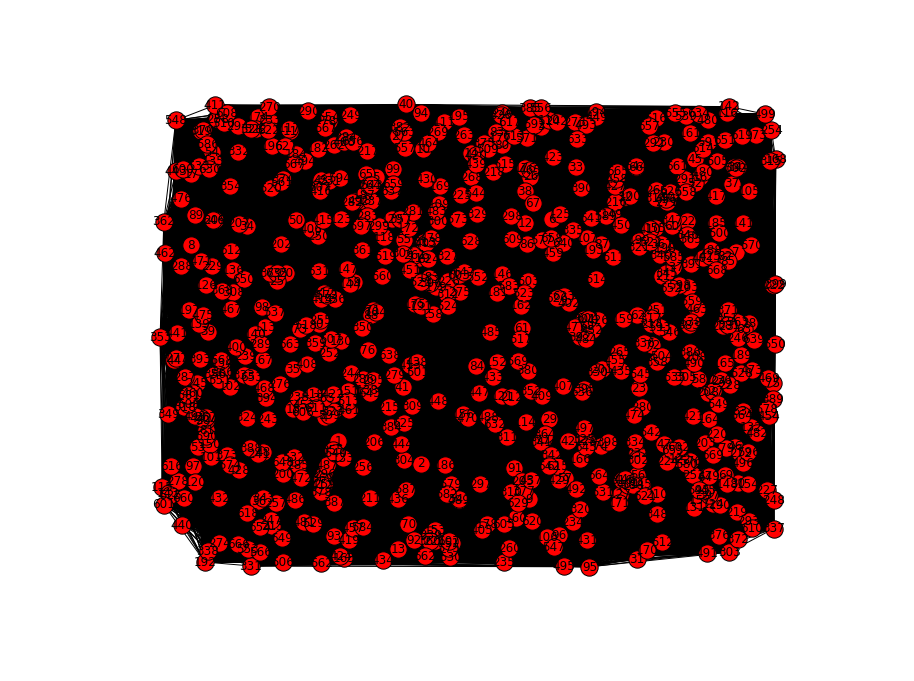

In [44]:
import pylab as plt
%matplotlib inline

import networkx as nx
delta=ngram_dist_matrix_dict['03']
G = nx.from_numpy_matrix(delta) 
pos = nx.random_layout(G) 

plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
nx.draw(G,pos,with_labels=True)



In [46]:
print G.edges(data = True)

[(0, 1, {'weight': 13.594019751346545}), (0, 2, {'weight': 10.481196401174818}), (0, 3, {'weight': 8.94328451968291}), (0, 4, {'weight': 9.613525679998986}), (0, 5, {'weight': 13.596124852324648}), (0, 6, {'weight': 11.014328304531329}), (0, 7, {'weight': 11.69965332819738}), (0, 8, {'weight': 6.068908056644125}), (0, 9, {'weight': 22.57018307413566}), (0, 10, {'weight': 22.540951310891913}), (0, 11, {'weight': 11.199587670981467}), (0, 12, {'weight': 9.593910151757726}), (0, 13, {'weight': 17.03713813995766}), (0, 14, {'weight': 13.37507016804024}), (0, 15, {'weight': 8.28129591308027}), (0, 16, {'weight': 10.470190924715748}), (0, 17, {'weight': 9.10993408318633}), (0, 18, {'weight': 17.706069241929445}), (0, 19, {'weight': 6.913884942635362}), (0, 20, {'weight': 10.998256361805723}), (0, 21, {'weight': 14.839595547049118}), (0, 22, {'weight': 7.777305574554725}), (0, 23, {'weight': 8.446968331892808}), (0, 24, {'weight': 8.220900194017684}), (0, 25, {'weight': 8.556677626275281}), (

In [ ]:
plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
plt.show()

In [ ]:
import networkx as nx
import community
import matplotlib.pyplot as plt
%matplotlib inline
#G = nx.random_graphs.powerlaw_cluster_graph(300, 1, .4)
#nx.transitivity(G)
G = nx.from_numpy_matrix(delta) 
#find modularity
part = community.best_partition(G)
#mod = community.modularity(part,G)
plt.figure(num=None, figsize=(12, 9), dpi=120, facecolor='w', edgecolor='k')
#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
plt.show()

currently it seems because this is a all-connected weighted network, the community detection hasn't worked. We need to dist threshold first. otherwise this is smooth.